In [363]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [364]:
df=pd.read_csv('Datos_limpios_mexico.csv')
df.head()

C:\Users\yack_\AppData\Local\Temp\ipykernel_18612\1522369616.py:1: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('Datos_limpios_mexico.csv')


Unnamed: 0.1                          listing_url host_name  host_since  \
0             0   https://www.airbnb.com/rooms/35797      Dici  28/06/2010   
1             1   https://www.airbnb.com/rooms/44616  Fernando  09/08/2010   
2             2   https://www.airbnb.com/rooms/67703  Nicholas  04/01/2011   
3             3   https://www.airbnb.com/rooms/70644    Trisha  24/08/2010   
4             4  https://www.airbnb.com/rooms/107078    Andrea  27/04/2011   

         host_location  host_response_time host_is_superhost  \
0  Mexico City, Mexico  a few days or more                 f   
1  Mexico City, Mexico      within an hour                 t   
2  Mexico City, Mexico      within an hour                 t   
3  Mexico City, Mexico  within a few hours                 t   
4  Mexico City, Mexico      within an hour                 t   

                 host_verifications host_has_profile_pic  \
0  ['email', 'phone', 'work_email']                    t   
1  ['email', 'phone', 'work_email']                    t   
2                ['email', 'phone']                    t   
3  ['email', 'phone', 'work_email']                    t   
4                ['email', 'phone']                    t   

  host_identity_verified  ... review_scores_cleanliness review_scores_checkin  \
0                      t  ...                  4.761882              4.843371   
1                      t  ...                  4.700000              4.870000   
2                      t  ...                  4.750000              4.940000   
3                      t  ...                  4.960000              4.960000   
4                      t  ...                  5.000000              5.000000   

  review_scores_communication review_scores_location review_scores_value  \
0                    4.829863               4.845981            4.725268   
1                    4.780000               4.980000            4.480000   
2                    4.920000               4.980000            4.910000   
3                    4.980000               4.960000            4.920000   
4                    4.730000               4.910000            4.820000   

  calculated_host_listings_count calculated_host_listings_count_entire_homes  \
0                            1.0                                         1.0   
1                            8.0                                         4.0   
2                            2.0                                         2.0   
3                            3.0                                         2.0   
4                            3.0                                         3.0   

  calculated_host_listings_count_private_rooms  \
0                                          0.0   
1                                          1.0   
2                                          0.0   
3                                          1.0   
4                                          0.0   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0          1.741839  
1                                           0          0.410000  
2                                           0          0.310000  
3                                           0          0.830000  
4                                           0          0.110000  

[5 rows x 52 columns]

In [365]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 52 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0.1                                  26582 non-null  int64  
 1   listing_url                                   26582 non-null  object 
 2   host_name                                     26582 non-null  object 
 3   host_since                                    26582 non-null  object 
 4   host_location                                 26582 non-null  object 
 5   host_response_time                            26582 non-null  object 
 6   host_is_superhost                             26582 non-null  object 
 7   host_verifications                            26582 non-null  object 
 8   host_has_profile_pic                          26582 non-null  object 
 9   host_identity_verified                        26582 non-null 

In [366]:
df["price"] = df["price"].str.replace(r'[^0-9.]', '', regex=True)
df["price"] = df["price"].replace('', np.nan)  # Reemplazar valores vacíos por NaN
df["price"] = df["price"].astype(float)  # Convertir a float

PRICE VS PRIVATE ROOM

In [367]:
df_private_room = df[df['room_type'] == 'Private room'].dropna(subset=['room_type', 'price'])
sns.scatterplot(x='room_type', y='price', data=df_private_room, color='blue')

<Axes: xlabel='room_type', ylabel='price'>

PRICE VS SHARED ROOM

<Axes: xlabel='room_type', ylabel='price'>

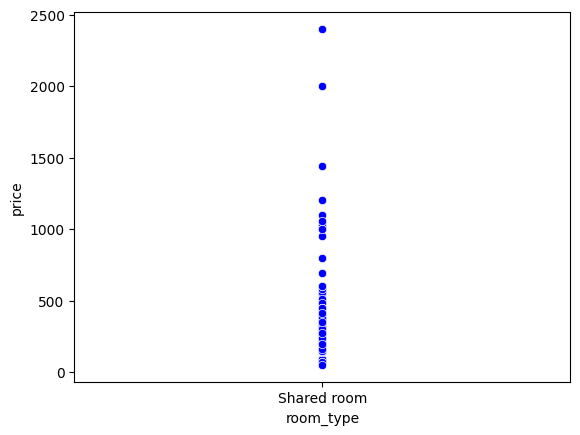

In [368]:
df_shared_room = df[df['room_type'] == 'Shared room'].dropna(subset=['room_type', 'price'])
sns.scatterplot(x='room_type', y='price', data=df_shared_room, color='blue')

PRICE VS ENTIRE HOME

In [369]:
df_entire_home = df[df['room_type'] == 'Entire home/apt'].dropna(subset=['room_type', 'price'])
sns.scatterplot(x='room_type', y='price', data=df_entire_home, color='blue')

<Axes: xlabel='room_type', ylabel='price'>

PRICE VS HOTEL ROOM

<Axes: xlabel='room_type', ylabel='price'>

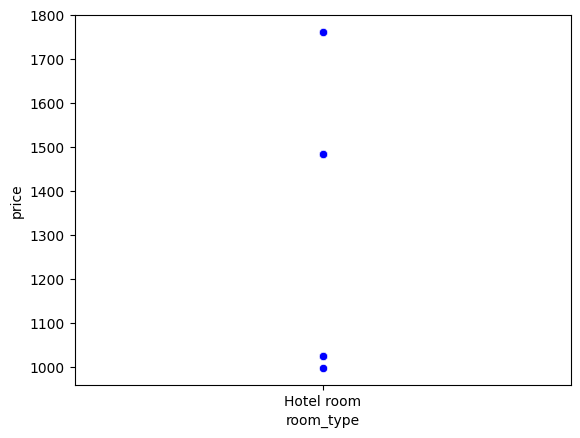

In [370]:
df_hotel_room = df[df['room_type'] == 'Hotel room'].dropna(subset=['room_type', 'price'])
sns.scatterplot(x='room_type', y='price', data=df_hotel_room, color='blue')

Cambiando variables de tipo String a Float

In [371]:
df["host_is_superhost"] = df["host_is_superhost"].map({"t": 1, "f": 0})
df["host_identity_verified"] = df["host_identity_verified"].map({"t": 1, "f": 0})
df["instant_bookable"] = df["instant_bookable"].map({"t": 1, "f": 0})
frecuencias = df['property_type'].value_counts()
df['property_type'] = df['property_type'].map(frecuencias)
print(df[['property_type']])
frecuencias2 = df['room_type'].value_counts()
df['room_type'] = df['room_type'].map(frecuencias2)
print(df[['room_type']])

       property_type
0                 13
1                817
2               9971
3               9971
4               1515
...              ...
26577            381
26578            504
26579            504
26580            504
26581           9971

[26582 rows x 1 columns]
       room_type
0          17363
1          17363
2          17363
3          17363
4          17363
...          ...
26577       8693
26578       8693
26579       8693
26580       8693
26581      17363

[26582 rows x 1 columns]


PRICE VS ROOM_TYPE

<Axes: xlabel='room_type', ylabel='price'>

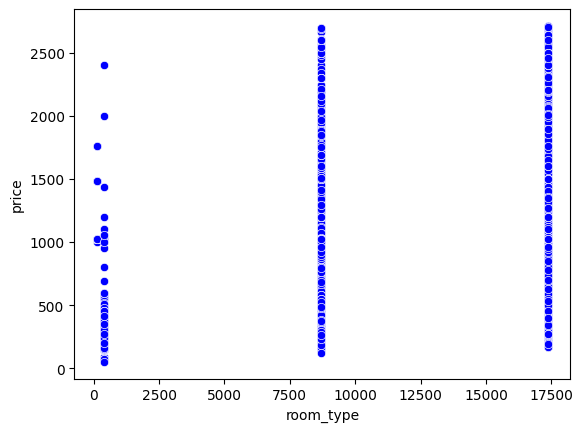

In [372]:
#Imprimir el scatter plot  entre la variable dependiente (total) e independiente (alcohol)
#para observar el comportamiento en su dispersión

from turtle import color

sns.scatterplot(x='room_type', y='price', color="blue", data=df)

In [373]:
#Declaramos las variables dependientes e independientes para la regresion lineal
#Vars_Indepe df[['alcohol', 'speeding']]
Vars_Indep= df[['room_type']]
Var_Dep= df['price']

In [374]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [375]:
Var_Dep.fillna(Var_Dep.mean(), inplace=True)  # Usa la media
# O también:
Var_Dep.fillna(Var_Dep.median(), inplace=True)  # Usa la mediana

In [376]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [377]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['room_type'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.02144027]),
 'rank_': 1,
 'singular_': array([733797.43026682]),
 'intercept_': np.float64(735.9321331056335)}

*Modelo matematico: y = 0.02144027x + 735.9321331056335*

In [378]:
#Predecimos los valores  de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[[alcohol]])
y_pred=model.predict(X=df[['room_type']])
y_pred

array([1108.19946651, 1108.19946651, 1108.19946651, ...,  922.31236286,
        922.31236286, 1108.19946651], shape=(26582,))

In [379]:
#Insertamos la columna de predicciones en el Dataframe
df.insert(0, 'Prediccion0', y_pred)
df

Prediccion0  Unnamed: 0.1  \
0      1108.199467             0   
1      1108.199467             1   
2      1108.199467             2   
3      1108.199467             3   
4      1108.199467             4   
...            ...           ...   
26577   922.312363         26577   
26578   922.312363         26578   
26579   922.312363         26579   
26580   922.312363         26580   
26581  1108.199467         26581   

                                            listing_url   host_name  \
0                    https://www.airbnb.com/rooms/35797        Dici   
1                    https://www.airbnb.com/rooms/44616    Fernando   
2                    https://www.airbnb.com/rooms/67703    Nicholas   
3                    https://www.airbnb.com/rooms/70644      Trisha   
4                   https://www.airbnb.com/rooms/107078      Andrea   
...                                                 ...         ...   
26577  https://www.airbnb.com/rooms/1252141718111439700     HostPal   
26578  https://www.airbnb.com/rooms/1252159821531694005  Luis Angel   
26579  https://www.airbnb.com/rooms/1252185591721328995  Luis Angel   
26580  https://www.airbnb.com/rooms/1252218347521498445  Luis Angel   
26581  https://www.airbnb.com/rooms/1252229157495978163    Salvador   

       host_since        host_location  host_response_time  host_is_superhost  \
0      28/06/2010  Mexico City, Mexico  a few days or more                  0   
1      09/08/2010  Mexico City, Mexico      within an hour                  1   
2      04/01/2011  Mexico City, Mexico      within an hour                  1   
3      24/08/2010  Mexico City, Mexico  within a few hours                  1   
4      27/04/2011  Mexico City, Mexico      within an hour                  1   
...           ...                  ...                 ...                ...   
26577  16/04/2016  Mexico City, Mexico      within an hour                  1   
26578  13/08/2024  Mexico City, Mexico      within an hour                  0   
26579  13/08/2024  Mexico City, Mexico      within an hour                  0   
26580  13/08/2024  Mexico City, Mexico      within an hour                  0   
26581  22/05/2013  Mexico City, Mexico      within an hour                  1   

                     host_verifications host_has_profile_pic  ...  \
0      ['email', 'phone', 'work_email']                    t  ...   
1      ['email', 'phone', 'work_email']                    t  ...   
2                    ['email', 'phone']                    t  ...   
3      ['email', 'phone', 'work_email']                    t  ...   
4                    ['email', 'phone']                    t  ...   
...                                 ...                  ...  ...   
26577                ['email', 'phone']                    t  ...   
26578                ['email', 'phone']                    t  ...   
26579                ['email', 'phone']                    t  ...   
26580                ['email', 'phone']                    t  ...   
26581                ['email', 'phone']                    t  ...   

       review_scores_cleanliness  review_scores_checkin  \
0                       4.761882               4.843371   
1                       4.700000               4.870000   
2                       4.750000               4.940000   
3                       4.960000               4.960000   
4                       5.000000               5.000000   
...                          ...                    ...   
26577                   4.761882               4.843371   
26578                   4.761882               4.843371   
26579                   4.761882               4.843371   
26580                   4.761882               4.843371   
26581                   4.761882               4.843371   

       review_scores_communication review_scores_location review_scores_value  \
0                         4.829863               4.845981            4.725268   
1                         4.780000              

<Axes: xlabel='room_type', ylabel='price'>

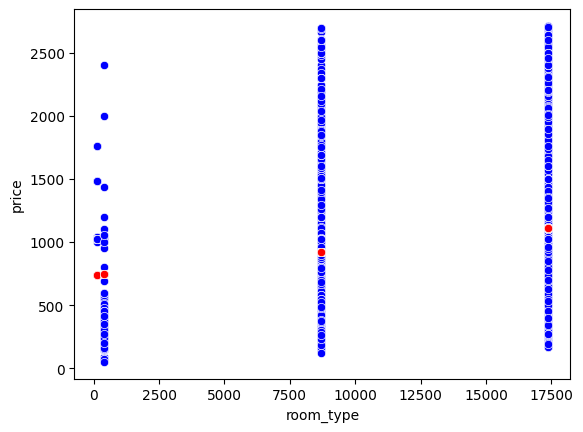

In [380]:
#Visualizamos la grafica comparativa entre el total real y el total predecido

sns.scatterplot(x='room_type', y='price', color="blue", data=df)
sns.scatterplot(x='room_type', y='Prediccion0', color="red", data=df)

#sns.lineplot(x='alcohol')

In [381]:
#Corroboramos cual es el coeficiente de Determinacion de nuestro modelo 
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.08681941453027775

In [382]:
#Corroboramos cual es el coeficiente de Correlacion de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.29465134401573284)

PRICE VS HOST_ACCEPTANCE_RATE

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

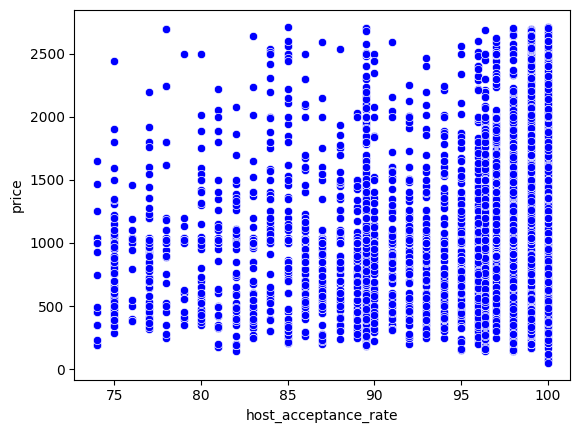

In [383]:
#Imprimir el scatter plot  entre la variable dependiente (total) e independiente (alcohol)
#para observar el comportamiento en su dispersión

from turtle import color

sns.scatterplot(x='host_acceptance_rate', y='price', color="blue", data=df)

In [384]:
#Declaramos las variables dependientes e independientes para la regresion lineal
#Vars_Indepe df[['alcohol', 'speeding']]
Vars_Indep= df[['host_acceptance_rate']]
Var_Dep= df['price']

In [385]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [386]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [387]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([4.13318914]),
 'rank_': 1,
 'singular_': array([839.69829516]),
 'intercept_': np.float64(641.7487384839989)}

*Modelo matematico: y = 4.13318914 + 641.7487384839989*

In [388]:
#Predecimos los valores  de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[[alcohol]])
y_pred=model.predict(X=df[['host_acceptance_rate']])
y_pred

array([1011.63038461, 1026.13532848, 1040.18817156, ..., 1055.06765246,
       1055.06765246, 1055.06765246], shape=(26582,))

In [389]:
#Insertamos la columna de predicciones en el Dataframe
df.insert(0, 'Prediccion1', y_pred)
df

Prediccion1  Prediccion0  Unnamed: 0.1  \
0      1011.630385  1108.199467             0   
1      1026.135328  1108.199467             1   
2      1040.188172  1108.199467             2   
3      1055.067652  1108.199467             3   
4      1055.067652  1108.199467             4   
...            ...          ...           ...   
26577  1055.067652   922.312363         26577   
26578  1055.067652   922.312363         26578   
26579  1055.067652   922.312363         26579   
26580  1055.067652   922.312363         26580   
26581  1055.067652  1108.199467         26581   

                                            listing_url   host_name  \
0                    https://www.airbnb.com/rooms/35797        Dici   
1                    https://www.airbnb.com/rooms/44616    Fernando   
2                    https://www.airbnb.com/rooms/67703    Nicholas   
3                    https://www.airbnb.com/rooms/70644      Trisha   
4                   https://www.airbnb.com/rooms/107078      Andrea   
...                                                 ...         ...   
26577  https://www.airbnb.com/rooms/1252141718111439700     HostPal   
26578  https://www.airbnb.com/rooms/1252159821531694005  Luis Angel   
26579  https://www.airbnb.com/rooms/1252185591721328995  Luis Angel   
26580  https://www.airbnb.com/rooms/1252218347521498445  Luis Angel   
26581  https://www.airbnb.com/rooms/1252229157495978163    Salvador   

       host_since        host_location  host_response_time  host_is_superhost  \
0      28/06/2010  Mexico City, Mexico  a few days or more                  0   
1      09/08/2010  Mexico City, Mexico      within an hour                  1   
2      04/01/2011  Mexico City, Mexico      within an hour                  1   
3      24/08/2010  Mexico City, Mexico  within a few hours                  1   
4      27/04/2011  Mexico City, Mexico      within an hour                  1   
...           ...                  ...                 ...                ...   
26577  16/04/2016  Mexico City, Mexico      within an hour                  1   
26578  13/08/2024  Mexico City, Mexico      within an hour                  0   
26579  13/08/2024  Mexico City, Mexico      within an hour                  0   
26580  13/08/2024  Mexico City, Mexico      within an hour                  0   
26581  22/05/2013  Mexico City, Mexico      within an hour                  1   

                     host_verifications  ... review_scores_cleanliness  \
0      ['email', 'phone', 'work_email']  ...                  4.761882   
1      ['email', 'phone', 'work_email']  ...                  4.700000   
2                    ['email', 'phone']  ...                  4.750000   
3      ['email', 'phone', 'work_email']  ...                  4.960000   
4                    ['email', 'phone']  ...                  5.000000   
...                                 ...  ...                       ...   
26577                ['email', 'phone']  ...                  4.761882   
26578                ['email', 'phone']  ...                  4.761882   
26579                ['email', 'phone']  ...                  4.761882   
26580                ['email', 'phone']  ...                  4.761882   
26581                ['email', 'phone']  ...                  4.761882   

       review_scores_checkin  review_scores_communication  \
0                   4.843371                     4.829863   
1                   4.870000                     4.780000   
2                   4.940000                     4.920000   
3                   4.960000                     4.980000   
4                   5.000000                     4.730000   
...                      ...                          ...   
26577               4.843371                     4.829863   
26578               4.843371                     4.829863   
26579               4.843371                     4.829863   
26580               4.843371                     4.829863   
26581               4.843371    

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

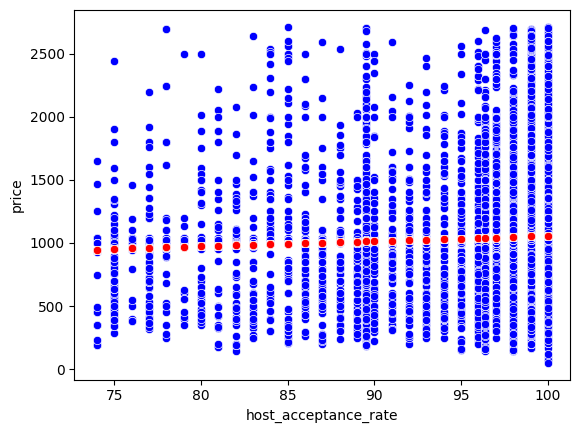

In [390]:
#Visualizamos la grafica comparativa entre el total real y el total predecido

sns.scatterplot(x='host_acceptance_rate', y='price', color="blue", data=df)
sns.scatterplot(x='host_acceptance_rate', y='Prediccion1', color="red", data=df)

#sns.lineplot(x='alcohol')

In [391]:
#Corroboramos cual es el coeficiente de Determinacion de nuestro modelo 
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.004224946904753835

In [392]:
#Corroboramos cual es el coeficiente de Correlacion de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.06499959157374632)

PRICE VS HOST_IS_SUPERHOST

<Axes: xlabel='host_is_superhost', ylabel='price'>

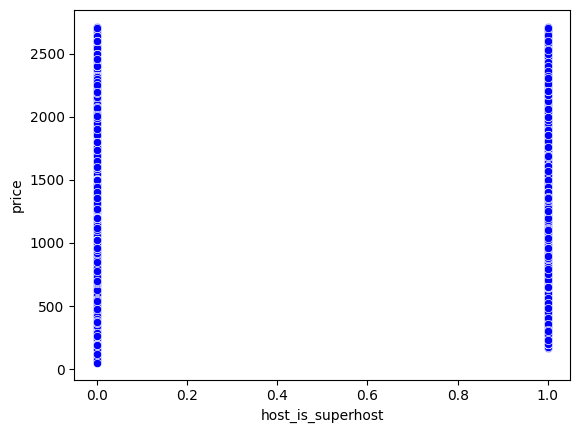

In [393]:
#Imprimir el scatter plot  entre la variable dependiente (total) e independiente (alcohol)
#para observar el comportamiento en su dispersión

from turtle import color

sns.scatterplot(x='host_is_superhost', y='price', color="blue", data=df)

In [394]:
#Declaramos las variables dependientes e independientes para la regresion lineal
#Vars_Indepe df[['alcohol', 'speeding']]
Vars_Indep= df[['host_is_superhost']]
Var_Dep= df['price']

In [395]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [396]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [397]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([37.71575023]),
 'rank_': 1,
 'singular_': array([78.53441437]),
 'intercept_': np.float64(1026.3844152881777)}

*Modelo matematico: y = 78.53441437 + 1026.3844152881777*

In [398]:
#Predecimos los valores  de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[[alcohol]])
y_pred=model.predict(X=df[['host_is_superhost']])
y_pred

array([1026.38441529, 1064.10016552, 1064.10016552, ..., 1026.38441529,
       1026.38441529, 1064.10016552], shape=(26582,))

In [399]:
#Insertamos la columna de predicciones en el Dataframe
df.insert(0, 'Prediccion2', y_pred)
df

Prediccion2  Prediccion1  Prediccion0  Unnamed: 0.1  \
0      1026.384415  1011.630385  1108.199467             0   
1      1064.100166  1026.135328  1108.199467             1   
2      1064.100166  1040.188172  1108.199467             2   
3      1064.100166  1055.067652  1108.199467             3   
4      1064.100166  1055.067652  1108.199467             4   
...            ...          ...          ...           ...   
26577  1064.100166  1055.067652   922.312363         26577   
26578  1026.384415  1055.067652   922.312363         26578   
26579  1026.384415  1055.067652   922.312363         26579   
26580  1026.384415  1055.067652   922.312363         26580   
26581  1064.100166  1055.067652  1108.199467         26581   

                                            listing_url   host_name  \
0                    https://www.airbnb.com/rooms/35797        Dici   
1                    https://www.airbnb.com/rooms/44616    Fernando   
2                    https://www.airbnb.com/rooms/67703    Nicholas   
3                    https://www.airbnb.com/rooms/70644      Trisha   
4                   https://www.airbnb.com/rooms/107078      Andrea   
...                                                 ...         ...   
26577  https://www.airbnb.com/rooms/1252141718111439700     HostPal   
26578  https://www.airbnb.com/rooms/1252159821531694005  Luis Angel   
26579  https://www.airbnb.com/rooms/1252185591721328995  Luis Angel   
26580  https://www.airbnb.com/rooms/1252218347521498445  Luis Angel   
26581  https://www.airbnb.com/rooms/1252229157495978163    Salvador   

       host_since        host_location  host_response_time  host_is_superhost  \
0      28/06/2010  Mexico City, Mexico  a few days or more                  0   
1      09/08/2010  Mexico City, Mexico      within an hour                  1   
2      04/01/2011  Mexico City, Mexico      within an hour                  1   
3      24/08/2010  Mexico City, Mexico  within a few hours                  1   
4      27/04/2011  Mexico City, Mexico      within an hour                  1   
...           ...                  ...                 ...                ...   
26577  16/04/2016  Mexico City, Mexico      within an hour                  1   
26578  13/08/2024  Mexico City, Mexico      within an hour                  0   
26579  13/08/2024  Mexico City, Mexico      within an hour                  0   
26580  13/08/2024  Mexico City, Mexico      within an hour                  0   
26581  22/05/2013  Mexico City, Mexico      within an hour                  1   

       ... review_scores_cleanliness review_scores_checkin  \
0      ...                  4.761882              4.843371   
1      ...                  4.700000              4.870000   
2      ...                  4.750000              4.940000   
3      ...                  4.960000              4.960000   
4      ...                  5.000000              5.000000   
...    ...                       ...                   ...   
26577  ...                  4.761882              4.843371   
26578  ...                  4.761882              4.843371   
26579  ...                  4.761882              4.843371   
26580  ...                  4.761882              4.843371   
26581  ...                  4.761882              4.843371   

       review_scores_communication  review_scores_location  \
0                         4.829863                4.845981   
1                         4.780000                4.980000   
2                         4.920000                4.980000   
3                         4.980000                4.960000   
4                         4.730000                4.910000   
...                            ...                     ...   
26577                     4.829863                4.845981   
26578                     4.829863                4.845981   
26579                     4.829863                4.845981   
26580                     4.829863                4.845981   
26581    

<Axes: xlabel='host_is_superhost', ylabel='price'>

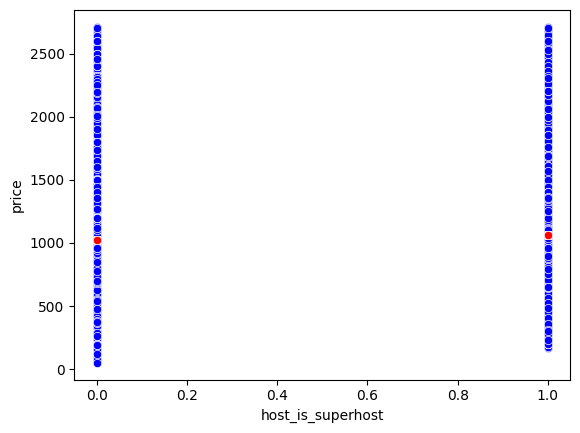

In [400]:
#Visualizamos la grafica comparativa entre el total real y el total predecido

sns.scatterplot(x='host_is_superhost', y='price', color="blue", data=df)
sns.scatterplot(x='host_is_superhost', y='Prediccion2', color="red", data=df)

#sns.lineplot(x='alcohol')

In [401]:
#Corroboramos cual es el coeficiente de Determinacion de nuestro modelo 
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.0030772988494838227

In [402]:
#Corroboramos cual es el coeficiente de Correlacion de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.05547340668720304)

ACCOMMODATES VS BATHROOMS

In [403]:
#Imprimir el scatter plot  entre la variable dependiente (total) e independiente (alcohol)
#para observar el comportamiento en su dispersión

from turtle import color

sns.scatterplot(x='bathrooms', y='accommodates', color="blue", data=df)

<Axes: xlabel='bathrooms', ylabel='accommodates'>

In [404]:
#Declaramos las variables dependientes e independientes para la regresion lineal
#Vars_Indepe df[['alcohol', 'speeding']]
Vars_Indep= df[['bathrooms']]
Var_Dep= df['accommodates']

In [405]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [406]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [407]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([1.02603889]),
 'rank_': 1,
 'singular_': array([88.54050046]),
 'intercept_': np.float64(1.5289558763214237)}

*Modelo matematico: y = 1.02603889x + 1.5289558763214237*

In [408]:
#Predecimos los valores  de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[[alcohol]])
y_pred=model.predict(X=df[['bathrooms']])
y_pred

array([2.55499476, 3.04221909, 2.55499476, ..., 2.55499476, 2.55499476,
       2.55499476], shape=(26582,))

In [409]:
#Insertamos la columna de predicciones en el Dataframe
df.insert(0, 'Prediccion3', y_pred)
df

Prediccion3  Prediccion2  Prediccion1  Prediccion0  Unnamed: 0.1  \
0         2.554995  1026.384415  1011.630385  1108.199467             0   
1         3.042219  1064.100166  1026.135328  1108.199467             1   
2         2.554995  1064.100166  1040.188172  1108.199467             2   
3         2.554995  1064.100166  1055.067652  1108.199467             3   
4         3.068014  1064.100166  1055.067652  1108.199467             4   
...            ...          ...          ...          ...           ...   
26577     2.554995  1064.100166  1055.067652   922.312363         26577   
26578     2.554995  1026.384415  1055.067652   922.312363         26578   
26579     2.554995  1026.384415  1055.067652   922.312363         26579   
26580     2.554995  1026.384415  1055.067652   922.312363         26580   
26581     2.554995  1064.100166  1055.067652  1108.199467         26581   

                                            listing_url   host_name  \
0                    https://www.airbnb.com/rooms/35797        Dici   
1                    https://www.airbnb.com/rooms/44616    Fernando   
2                    https://www.airbnb.com/rooms/67703    Nicholas   
3                    https://www.airbnb.com/rooms/70644      Trisha   
4                   https://www.airbnb.com/rooms/107078      Andrea   
...                                                 ...         ...   
26577  https://www.airbnb.com/rooms/1252141718111439700     HostPal   
26578  https://www.airbnb.com/rooms/1252159821531694005  Luis Angel   
26579  https://www.airbnb.com/rooms/1252185591721328995  Luis Angel   
26580  https://www.airbnb.com/rooms/1252218347521498445  Luis Angel   
26581  https://www.airbnb.com/rooms/1252229157495978163    Salvador   

       host_since        host_location  host_response_time  ...  \
0      28/06/2010  Mexico City, Mexico  a few days or more  ...   
1      09/08/2010  Mexico City, Mexico      within an hour  ...   
2      04/01/2011  Mexico City, Mexico      within an hour  ...   
3      24/08/2010  Mexico City, Mexico  within a few hours  ...   
4      27/04/2011  Mexico City, Mexico      within an hour  ...   
...           ...                  ...                 ...  ...   
26577  16/04/2016  Mexico City, Mexico      within an hour  ...   
26578  13/08/2024  Mexico City, Mexico      within an hour  ...   
26579  13/08/2024  Mexico City, Mexico      within an hour  ...   
26580  13/08/2024  Mexico City, Mexico      within an hour  ...   
26581  22/05/2013  Mexico City, Mexico      within an hour  ...   

       review_scores_cleanliness review_scores_checkin  \
0                       4.761882              4.843371   
1                       4.700000              4.870000   
2                       4.750000              4.940000   
3                       4.960000              4.960000   
4                       5.000000              5.000000   
...                          ...                   ...   
26577                   4.761882              4.843371   
26578                   4.761882              4.843371   
26579                   4.761882              4.843371   
26580                   4.761882              4.843371   
26581                   4.761882              4.843371   

      review_scores_communication  review_scores_location  \
0                        4.829863                4.845981   
1                        4.780000                4.980000   
2                        4.920000                4.980000   
3                        4.980000                4.960000   
4                        4.730000                4.910000   
...                           ...                     ...   
26577                    4.829863                4.845981   
26578                    4.829863                4.845981   
26579                    4.829863                4.845981   
26580                    4.829863                4.845981   
26581                    4.829863                4.845981   

       review_scor

<Axes: xlabel='bathrooms', ylabel='accommodates'>

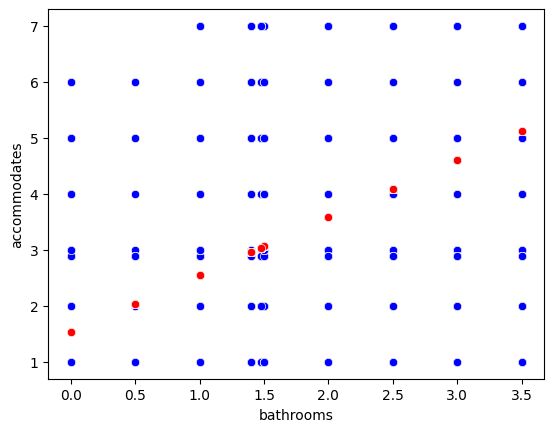

In [410]:
#Visualizamos la grafica comparativa entre el total real y el total predecido

sns.scatterplot(x='bathrooms', y='accommodates', color="blue", data=df)
sns.scatterplot(x='bathrooms', y='Prediccion3', color="red", data=df)

#sns.lineplot(x='alcohol')

In [411]:
#Corroboramos cual es el coeficiente de Determinacion de nuestro modelo 
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.15000539209388097

In [412]:
#Corroboramos cual es el coeficiente de Correlacion de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.38730529572145145)

PRICE VS REVIEW_SCORES_CLEANLINESS

In [413]:
#Imprimir el scatter plot  entre la variable dependiente (total) e independiente (alcohol)
#para observar el comportamiento en su dispersión

from turtle import color

sns.scatterplot(x='review_scores_cleanliness', y='price', color="blue", data=df)

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

In [414]:
#Declaramos las variables dependientes e independientes para la regresion lineal
#Vars_Indepe df[['alcohol', 'speeding']]
Vars_Indep= df[['review_scores_cleanliness']]
Var_Dep= df['price']

In [415]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [416]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [417]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([121.63996869]),
 'rank_': 1,
 'singular_': array([21.84300633]),
 'intercept_': np.float64(452.8073779669594)}

*Modelo matematico: y = 121.63996869x + 452.8073779669594*

In [418]:
#Predecimos los valores  de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[[alcohol]])
y_pred=model.predict(X=df[['review_scores_cleanliness']])
y_pred

array([1032.04252955, 1024.5152308 , 1030.59722923, ..., 1032.04252955,
       1032.04252955, 1032.04252955], shape=(26582,))

In [419]:
#Insertamos la columna de predicciones en el Dataframe
df.insert(0, 'Prediccion4', y_pred)
df

Prediccion4  Prediccion3  Prediccion2  Prediccion1  Prediccion0  \
0      1032.042530     2.554995  1026.384415  1011.630385  1108.199467   
1      1024.515231     3.042219  1064.100166  1026.135328  1108.199467   
2      1030.597229     2.554995  1064.100166  1040.188172  1108.199467   
3      1056.141623     2.554995  1064.100166  1055.067652  1108.199467   
4      1061.007221     3.068014  1064.100166  1055.067652  1108.199467   
...            ...          ...          ...          ...          ...   
26577  1032.042530     2.554995  1064.100166  1055.067652   922.312363   
26578  1032.042530     2.554995  1026.384415  1055.067652   922.312363   
26579  1032.042530     2.554995  1026.384415  1055.067652   922.312363   
26580  1032.042530     2.554995  1026.384415  1055.067652   922.312363   
26581  1032.042530     2.554995  1064.100166  1055.067652  1108.199467   

       Unnamed: 0.1                                       listing_url  \
0                 0                https://www.airbnb.com/rooms/35797   
1                 1                https://www.airbnb.com/rooms/44616   
2                 2                https://www.airbnb.com/rooms/67703   
3                 3                https://www.airbnb.com/rooms/70644   
4                 4               https://www.airbnb.com/rooms/107078   
...             ...                                               ...   
26577         26577  https://www.airbnb.com/rooms/1252141718111439700   
26578         26578  https://www.airbnb.com/rooms/1252159821531694005   
26579         26579  https://www.airbnb.com/rooms/1252185591721328995   
26580         26580  https://www.airbnb.com/rooms/1252218347521498445   
26581         26581  https://www.airbnb.com/rooms/1252229157495978163   

        host_name  host_since        host_location  ...  \
0            Dici  28/06/2010  Mexico City, Mexico  ...   
1        Fernando  09/08/2010  Mexico City, Mexico  ...   
2        Nicholas  04/01/2011  Mexico City, Mexico  ...   
3          Trisha  24/08/2010  Mexico City, Mexico  ...   
4          Andrea  27/04/2011  Mexico City, Mexico  ...   
...           ...         ...                  ...  ...   
26577     HostPal  16/04/2016  Mexico City, Mexico  ...   
26578  Luis Angel  13/08/2024  Mexico City, Mexico  ...   
26579  Luis Angel  13/08/2024  Mexico City, Mexico  ...   
26580  Luis Angel  13/08/2024  Mexico City, Mexico  ...   
26581    Salvador  22/05/2013  Mexico City, Mexico  ...   

      review_scores_cleanliness  review_scores_checkin  \
0                      4.761882               4.843371   
1                      4.700000               4.870000   
2                      4.750000               4.940000   
3                      4.960000               4.960000   
4                      5.000000               5.000000   
...                         ...                    ...   
26577                  4.761882               4.843371   
26578                  4.761882               4.843371   
26579                  4.761882               4.843371   
26580                  4.761882               4.843371   
26581                  4.761882               4.843371   

      review_scores_communication review_scores_location  review_scores_value  \
0                        4.829863               4.845981             4.725268   
1                        4.780000               4.980000             4.480000   
2                        4.920000               4.980000             4.910000   
3                        4.980000               4.960000             4.920000   
4                        4.730000               4.910000             4.820000   
...                           ...                    ...                  ...   
26577                    4.829863               4.845981             4.725268   
26578                    4.829863               4.845981             4.725268   
26579                    4.829863               4.845981             4.725268   
26580                    

In [420]:
#Visualizamos la grafica comparativa entre el total real y el total predecido

sns.scatterplot(x='review_scores_cleanliness', y='price', color="blue", data=df)
sns.scatterplot(x='review_scores_cleanliness', y='Prediccion4', color="red", data=df)

#sns.lineplot(x='alcohol')

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

In [421]:
#Corroboramos cual es el coeficiente de Determinacion de nuestro modelo 
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.0024761763761232958

In [422]:
#Corroboramos cual es el coeficiente de Correlacion de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.049761193475672344)

PRICE VS HOST_IDENTITY_VERIFIED

In [423]:
#Imprimir el scatter plot  entre la variable dependiente (total) e independiente (alcohol)
#para observar el comportamiento en su dispersión

from turtle import color

sns.scatterplot(x='host_identity_verified', y='price', color="blue", data=df)

<Axes: xlabel='host_identity_verified', ylabel='price'>

In [424]:
#Declaramos las variables dependientes e independientes para la regresion lineal
#Vars_Indepe df[['alcohol', 'speeding']]
Vars_Indep= df[['host_identity_verified']]
Var_Dep= df['price']

In [425]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [426]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [427]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_identity_verified'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([28.74226122]),
 'rank_': 1,
 'singular_': array([33.25248541]),
 'intercept_': np.float64(1012.6932095334373)}

*Modelo matematico: y = 28.74226122 + 1012.6932095334373*

In [428]:
#Predecimos los valores  de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[[alcohol]])
y_pred=model.predict(X=df[['host_identity_verified']])
y_pred

array([1041.43547076, 1041.43547076, 1041.43547076, ..., 1041.43547076,
       1041.43547076, 1041.43547076], shape=(26582,))

In [429]:
#Insertamos la columna de predicciones en el Dataframe
df.insert(0, 'Prediccion5', y_pred)
df

Prediccion5  Prediccion4  Prediccion3  Prediccion2  Prediccion1  \
0      1041.435471  1032.042530     2.554995  1026.384415  1011.630385   
1      1041.435471  1024.515231     3.042219  1064.100166  1026.135328   
2      1041.435471  1030.597229     2.554995  1064.100166  1040.188172   
3      1041.435471  1056.141623     2.554995  1064.100166  1055.067652   
4      1041.435471  1061.007221     3.068014  1064.100166  1055.067652   
...            ...          ...          ...          ...          ...   
26577  1041.435471  1032.042530     2.554995  1064.100166  1055.067652   
26578  1041.435471  1032.042530     2.554995  1026.384415  1055.067652   
26579  1041.435471  1032.042530     2.554995  1026.384415  1055.067652   
26580  1041.435471  1032.042530     2.554995  1026.384415  1055.067652   
26581  1041.435471  1032.042530     2.554995  1064.100166  1055.067652   

       Prediccion0  Unnamed: 0.1  \
0      1108.199467             0   
1      1108.199467             1   
2      1108.199467             2   
3      1108.199467             3   
4      1108.199467             4   
...            ...           ...   
26577   922.312363         26577   
26578   922.312363         26578   
26579   922.312363         26579   
26580   922.312363         26580   
26581  1108.199467         26581   

                                            listing_url   host_name  \
0                    https://www.airbnb.com/rooms/35797        Dici   
1                    https://www.airbnb.com/rooms/44616    Fernando   
2                    https://www.airbnb.com/rooms/67703    Nicholas   
3                    https://www.airbnb.com/rooms/70644      Trisha   
4                   https://www.airbnb.com/rooms/107078      Andrea   
...                                                 ...         ...   
26577  https://www.airbnb.com/rooms/1252141718111439700     HostPal   
26578  https://www.airbnb.com/rooms/1252159821531694005  Luis Angel   
26579  https://www.airbnb.com/rooms/1252185591721328995  Luis Angel   
26580  https://www.airbnb.com/rooms/1252218347521498445  Luis Angel   
26581  https://www.airbnb.com/rooms/1252229157495978163    Salvador   

       host_since  ... review_scores_cleanliness review_scores_checkin  \
0      28/06/2010  ...                  4.761882              4.843371   
1      09/08/2010  ...                  4.700000              4.870000   
2      04/01/2011  ...                  4.750000              4.940000   
3      24/08/2010  ...                  4.960000              4.960000   
4      27/04/2011  ...                  5.000000              5.000000   
...           ...  ...                       ...                   ...   
26577  16/04/2016  ...                  4.761882              4.843371   
26578  13/08/2024  ...                  4.761882              4.843371   
26579  13/08/2024  ...                  4.761882              4.843371   
26580  13/08/2024  ...                  4.761882              4.843371   
26581  22/05/2013  ...                  4.761882              4.843371   

       review_scores_communication review_scores_location review_scores_value  \
0                         4.829863               4.845981            4.725268   
1                         4.780000               4.980000            4.480000   
2                         4.920000               4.980000            4.910000   
3                         4.980000               4.960000            4.920000   
4                         4.730000               4.910000            4.820000   
...                            ...                    ...                 ...   
26577                     4.829863               4.845981            4.725268   
26578                     4.829863               4.845981            4.725268   
26579                     4.829863               4.845981            4.725268   
26580                     4.829863               4.845981            4.725268   
26581                     4.829863               4.8

In [430]:
#Visualizamos la grafica comparativa entre el total real y el total predecido

sns.scatterplot(x='host_identity_verified', y='price', color="blue", data=df)
sns.scatterplot(x='host_identity_verified', y='Prediccion5', color="red", data=df)

#sns.lineplot(x='alcohol')

<Axes: xlabel='host_identity_verified', ylabel='price'>

In [431]:
#Corroboramos cual es el coeficiente de Determinacion de nuestro modelo 
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.0003204012788049493

In [432]:
#Corroboramos cual es el coeficiente de Correlacion de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.017899756389541988)

PRICE VS INSTANT_BOOKABLE

In [433]:
#Imprimir el scatter plot  entre la variable dependiente (total) e independiente (alcohol)
#para observar el comportamiento en su dispersión

from turtle import color

sns.scatterplot(x='instant_bookable', y='price', color="blue", data=df)

<Axes: xlabel='instant_bookable', ylabel='price'>

In [434]:
#Declaramos las variables dependientes e independientes para la regresion lineal
#Vars_Indepe df[['alcohol', 'speeding']]
Vars_Indep= df[['instant_bookable']]
Var_Dep= df['price']

In [435]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [436]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [437]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['instant_bookable'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([69.28326992]),
 'rank_': 1,
 'singular_': array([79.70493324]),
 'intercept_': np.float64(1012.8131340374441)}

*Modelo matematico: y = 69.28326992x + 1012.8131340374441*

In [438]:
#Predecimos los valores  de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[[alcohol]])
y_pred=model.predict(X=df[['instant_bookable']])
y_pred

array([1012.81313404, 1012.81313404, 1012.81313404, ..., 1082.09640395,
       1082.09640395, 1082.09640395], shape=(26582,))

In [439]:
#Insertamos la columna de predicciones en el Dataframe
df.insert(0, 'Prediccion6', y_pred)
df

Prediccion6  Prediccion5  Prediccion4  Prediccion3  Prediccion2  \
0      1012.813134  1041.435471  1032.042530     2.554995  1026.384415   
1      1012.813134  1041.435471  1024.515231     3.042219  1064.100166   
2      1012.813134  1041.435471  1030.597229     2.554995  1064.100166   
3      1012.813134  1041.435471  1056.141623     2.554995  1064.100166   
4      1012.813134  1041.435471  1061.007221     3.068014  1064.100166   
...            ...          ...          ...          ...          ...   
26577  1082.096404  1041.435471  1032.042530     2.554995  1064.100166   
26578  1082.096404  1041.435471  1032.042530     2.554995  1026.384415   
26579  1082.096404  1041.435471  1032.042530     2.554995  1026.384415   
26580  1082.096404  1041.435471  1032.042530     2.554995  1026.384415   
26581  1082.096404  1041.435471  1032.042530     2.554995  1064.100166   

       Prediccion1  Prediccion0  Unnamed: 0.1  \
0      1011.630385  1108.199467             0   
1      1026.135328  1108.199467             1   
2      1040.188172  1108.199467             2   
3      1055.067652  1108.199467             3   
4      1055.067652  1108.199467             4   
...            ...          ...           ...   
26577  1055.067652   922.312363         26577   
26578  1055.067652   922.312363         26578   
26579  1055.067652   922.312363         26579   
26580  1055.067652   922.312363         26580   
26581  1055.067652  1108.199467         26581   

                                            listing_url   host_name  ...  \
0                    https://www.airbnb.com/rooms/35797        Dici  ...   
1                    https://www.airbnb.com/rooms/44616    Fernando  ...   
2                    https://www.airbnb.com/rooms/67703    Nicholas  ...   
3                    https://www.airbnb.com/rooms/70644      Trisha  ...   
4                   https://www.airbnb.com/rooms/107078      Andrea  ...   
...                                                 ...         ...  ...   
26577  https://www.airbnb.com/rooms/1252141718111439700     HostPal  ...   
26578  https://www.airbnb.com/rooms/1252159821531694005  Luis Angel  ...   
26579  https://www.airbnb.com/rooms/1252185591721328995  Luis Angel  ...   
26580  https://www.airbnb.com/rooms/1252218347521498445  Luis Angel  ...   
26581  https://www.airbnb.com/rooms/1252229157495978163    Salvador  ...   

      review_scores_cleanliness review_scores_checkin  \
0                      4.761882              4.843371   
1                      4.700000              4.870000   
2                      4.750000              4.940000   
3                      4.960000              4.960000   
4                      5.000000              5.000000   
...                         ...                   ...   
26577                  4.761882              4.843371   
26578                  4.761882              4.843371   
26579                  4.761882              4.843371   
26580                  4.761882              4.843371   
26581                  4.761882              4.843371   

      review_scores_communication  review_scores_location review_scores_value  \
0                        4.829863                4.845981            4.725268   
1                        4.780000                4.980000            4.480000   
2                        4.920000                4.980000            4.910000   
3                        4.980000                4.960000            4.920000   
4                        4.730000                4.910000            4.820000   
...                           ...                     ...                 ...   
26577                    4.829863                4.845981            4.725268   
26578                    4.829863                4.845981            4.725268   
26579                    4.829863                4.845981            4.725268   
26580                    4.829863                4.845981            4.725268   
26581                    4.829863       

<Axes: xlabel='instant_bookable', ylabel='price'>

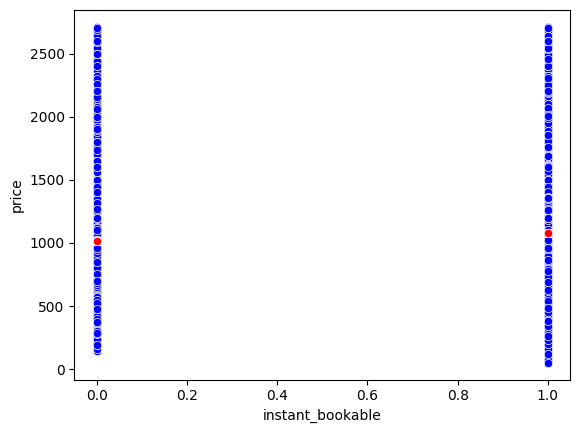

In [440]:
#Visualizamos la grafica comparativa entre el total real y el total predecido

sns.scatterplot(x='instant_bookable', y='price', color="blue", data=df)
sns.scatterplot(x='instant_bookable', y='Prediccion6', color="red", data=df)

#sns.lineplot(x='alcohol')

In [441]:
#Corroboramos cual es el coeficiente de Determinacion de nuestro modelo 
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.010696244246352182

In [442]:
#Corroboramos cual es el coeficiente de Correlacion de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.10342264861408347)

PRICE VS PROPERTY_TYPE

<Axes: xlabel='property_type', ylabel='price'>

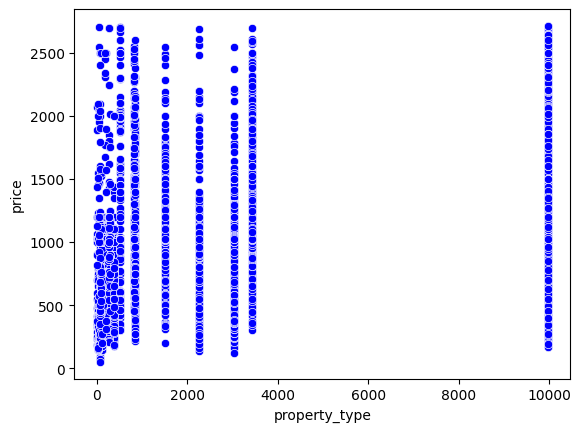

In [443]:
#Imprimir el scatter plot  entre la variable dependiente (total) e independiente (alcohol)
#para observar el comportamiento en su dispersión

from turtle import color

sns.scatterplot(x='property_type', y='price', color="blue", data=df)

In [444]:
#Declaramos las variables dependientes e independientes para la regresion lineal
#Vars_Indepe df[['alcohol', 'speeding']]
Vars_Indep= df[['property_type']]
Var_Dep= df['price']

In [445]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [446]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [447]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['property_type'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.01973179]),
 'rank_': 1,
 'singular_': array([658435.95872439]),
 'intercept_': np.float64(943.1411955457061)}

*Modelo matematico: y = 0.01973179x + 943.1411955457061*

In [448]:
#Predecimos los valores  de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[[alcohol]])
y_pred=model.predict(X=df[['property_type']])
y_pred

array([ 943.39770887,  959.26207168, 1139.88691883, ...,  953.08601999,
        953.08601999, 1139.88691883], shape=(26582,))

In [449]:
#Insertamos la columna de predicciones en el Dataframe
df.insert(0, 'Prediccion7', y_pred)
df

Prediccion7  Prediccion6  Prediccion5  Prediccion4  Prediccion3  \
0       943.397709  1012.813134  1041.435471  1032.042530     2.554995   
1       959.262072  1012.813134  1041.435471  1024.515231     3.042219   
2      1139.886919  1012.813134  1041.435471  1030.597229     2.554995   
3      1139.886919  1012.813134  1041.435471  1056.141623     2.554995   
4       973.034864  1012.813134  1041.435471  1061.007221     3.068014   
...            ...          ...          ...          ...          ...   
26577   950.659009  1082.096404  1041.435471  1032.042530     2.554995   
26578   953.086020  1082.096404  1041.435471  1032.042530     2.554995   
26579   953.086020  1082.096404  1041.435471  1032.042530     2.554995   
26580   953.086020  1082.096404  1041.435471  1032.042530     2.554995   
26581  1139.886919  1082.096404  1041.435471  1032.042530     2.554995   

       Prediccion2  Prediccion1  Prediccion0  Unnamed: 0.1  \
0      1026.384415  1011.630385  1108.199467             0   
1      1064.100166  1026.135328  1108.199467             1   
2      1064.100166  1040.188172  1108.199467             2   
3      1064.100166  1055.067652  1108.199467             3   
4      1064.100166  1055.067652  1108.199467             4   
...            ...          ...          ...           ...   
26577  1064.100166  1055.067652   922.312363         26577   
26578  1026.384415  1055.067652   922.312363         26578   
26579  1026.384415  1055.067652   922.312363         26579   
26580  1026.384415  1055.067652   922.312363         26580   
26581  1064.100166  1055.067652  1108.199467         26581   

                                            listing_url  ...  \
0                    https://www.airbnb.com/rooms/35797  ...   
1                    https://www.airbnb.com/rooms/44616  ...   
2                    https://www.airbnb.com/rooms/67703  ...   
3                    https://www.airbnb.com/rooms/70644  ...   
4                   https://www.airbnb.com/rooms/107078  ...   
...                                                 ...  ...   
26577  https://www.airbnb.com/rooms/1252141718111439700  ...   
26578  https://www.airbnb.com/rooms/1252159821531694005  ...   
26579  https://www.airbnb.com/rooms/1252185591721328995  ...   
26580  https://www.airbnb.com/rooms/1252218347521498445  ...   
26581  https://www.airbnb.com/rooms/1252229157495978163  ...   

      review_scores_cleanliness review_scores_checkin  \
0                      4.761882              4.843371   
1                      4.700000              4.870000   
2                      4.750000              4.940000   
3                      4.960000              4.960000   
4                      5.000000              5.000000   
...                         ...                   ...   
26577                  4.761882              4.843371   
26578                  4.761882              4.843371   
26579                  4.761882              4.843371   
26580                  4.761882              4.843371   
26581                  4.761882              4.843371   

      review_scores_communication review_scores_location  review_scores_value  \
0                        4.829863               4.845981             4.725268   
1                        4.780000               4.980000             4.480000   
2                        4.920000               4.980000             4.910000   
3                        4.980000               4.960000             4.920000   
4                        4.730000               4.910000             4.820000   
...                           ...                    ...                  ...   
26577                    4.829863               4.845981             4.725268   
26578                    4.829863               4.845981             4.725268   
26579                    4.829863               4.845981             4.725268   
26580                    4.829863               4.845981             4.725268   
26581                    4.8

<Axes: xlabel='instant_bookable', ylabel='price'>

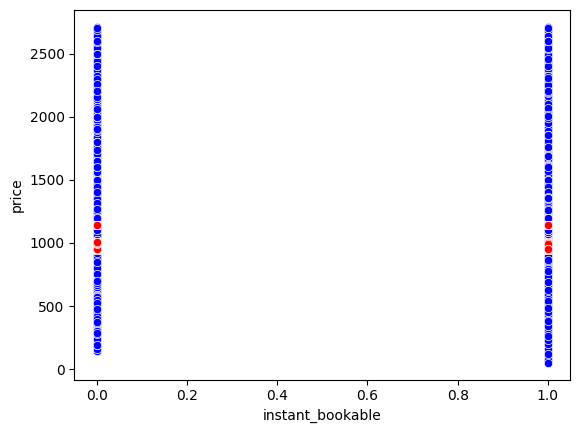

In [450]:
#Visualizamos la grafica comparativa entre el total real y el total predecido

sns.scatterplot(x='instant_bookable', y='price', color="blue", data=df)
sns.scatterplot(x='instant_bookable', y='Prediccion7', color="red", data=df)

#sns.lineplot(x='alcohol')

In [451]:
#Corroboramos cual es el coeficiente de Determinacion de nuestro modelo 
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.059205820458697156

In [452]:
#Corroboramos cual es el coeficiente de Correlacion de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.24332246188689025)

In [453]:
df.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 60 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Prediccion7                                   26582 non-null  float64
 1   Prediccion6                                   26582 non-null  float64
 2   Prediccion5                                   26582 non-null  float64
 3   Prediccion4                                   26582 non-null  float64
 4   Prediccion3                                   26582 non-null  float64
 5   Prediccion2                                   26582 non-null  float64
 6   Prediccion1                                   26582 non-null  float64
 7   Prediccion0                                   26582 non-null  float64
 8   Unnamed: 0.1                                  26582 non-null  int64  
 9   listing_url                                   26582 non-null 

In [454]:
filtro = df.loc[:, ["Prediccion0", "Prediccion1", "Prediccion2", "Prediccion3", "Prediccion4", 
                    "Prediccion5", "Prediccion6", "Prediccion7", "host_id", 
                    "host_acceptance_rate", "host_is_superhost", "host_total_listings_count", 
                    "room_type", "accommodates", "bedrooms", "price", 
                    "review_scores_value", "reviews_per_month"]]
filtro

Prediccion0  Prediccion1  Prediccion2  Prediccion3  Prediccion4  \
0      1108.199467  1011.630385  1026.384415     2.554995  1032.042530   
1      1108.199467  1026.135328  1064.100166     3.042219  1024.515231   
2      1108.199467  1040.188172  1064.100166     2.554995  1030.597229   
3      1108.199467  1055.067652  1064.100166     2.554995  1056.141623   
4      1108.199467  1055.067652  1064.100166     3.068014  1061.007221   
...            ...          ...          ...          ...          ...   
26577   922.312363  1055.067652  1064.100166     2.554995  1032.042530   
26578   922.312363  1055.067652  1026.384415     2.554995  1032.042530   
26579   922.312363  1055.067652  1026.384415     2.554995  1032.042530   
26580   922.312363  1055.067652  1026.384415     2.554995  1032.042530   
26581  1108.199467  1055.067652  1064.100166     2.554995  1032.042530   

       Prediccion5  Prediccion6  Prediccion7    host_id  host_acceptance_rate  \
0      1041.435471  1012.813134   943.397709     153786             89.490617   
1      1041.435471  1012.813134   959.262072     196253             93.000000   
2      1041.435471  1012.813134  1139.886919     334451             96.400000   
3      1041.435471  1012.813134  1139.886919     212109            100.000000   
4      1041.435471  1012.813134   973.034864     540705            100.000000   
...            ...          ...          ...        ...                   ...   
26577  1041.435471  1082.096404   950.659009   67472234            100.000000   
26578  1041.435471  1082.096404   953.086020  596009321            100.000000   
26579  1041.435471  1082.096404   953.086020  596009321            100.000000   
26580  1041.435471  1082.096404   953.086020  596009321            100.000000   
26581  1041.435471  1082.096404  1139.886919    6522855            100.000000   

       host_is_superhost  host_total_listings_count  room_type  accommodates  \
0                      0                        1.0      17363           2.0   
1                      1                       13.0      17363           2.9   
2                      1                        4.0      17363           4.0   
3                      1                        4.0      17363           2.0   
4                      1                        7.0      17363           2.0   
...                  ...                        ...        ...           ...   
26577                  1                        7.3       8693           4.0   
26578                  0                       16.0       8693           2.0   
26579                  0                       16.0       8693           2.0   
26580                  0                       16.0       8693           2.0   
26581                  1                        6.0      17363           2.0   

       bedrooms        price  review_scores_value  reviews_per_month  
0           1.0  1040.185525             4.725268           1.741839  
1           1.4  1040.185525             4.480000           0.410000  
2           2.0  1040.185525             4.910000           0.310000  
3           1.0  1040.185525             4.920000           0.830000  
4           1.0  1040.185525             4.820000           0.110000  
...         ...          ...                  ...                ...  
26577       2.0   488.000000             4.725268           1.741839  
26578       1.0  1026.300000             4.725268           1.741839  
26579       1.0  2700.000000             4.725268           1.741839  
26580       1.0  2600.000000             4.725268           1.741839  
26581       1.0  1353.000000             4.725268           1.741839  

[26582 rows x 18 columns]

In [455]:
#Encontramos todas las correlaciones entre las variables
#Encontramos todas las correlaciones entre las variables
Corr_Factors=filtro.corr()
Corr_Factors

Prediccion0  Prediccion1  Prediccion2  Prediccion3  \
Prediccion0                   1.000000     0.152541     0.163251     0.142201   
Prediccion1                   0.152541     1.000000     0.215482     0.000047   
Prediccion2                   0.163251     0.215482     1.000000     0.018819   
Prediccion3                   0.142201     0.000047     0.018819     1.000000   
Prediccion4                   0.043631    -0.002993     0.188506     0.016824   
Prediccion5                   0.144781     0.194548     0.130198    -0.028080   
Prediccion6                   0.051304     0.317017     0.051291    -0.002719   
Prediccion7                   0.573236     0.084172     0.040952     0.106878   
host_id                      -0.036081     0.035457    -0.073037    -0.044898   
host_acceptance_rate          0.152541     1.000000     0.215482     0.000047   
host_is_superhost             0.163251     0.215482     1.000000     0.018819   
host_total_listings_count     0.010456     0.170051    -0.008520     0.001479   
room_type                     1.000000     0.152541     0.163251     0.142201   
accommodates                  0.490979     0.098410     0.102529     0.387305   
bedrooms                      0.376202     0.019438     0.066651     0.512886   
price                         0.294651     0.065000     0.055473     0.157143   
review_scores_value          -0.020965    -0.041521     0.155953     0.050978   
reviews_per_month             0.181797     0.197945     0.214641     0.021238   

                           Prediccion4  Prediccion5  Prediccion6  Prediccion7  \
Prediccion0                   0.043631     0.144781     0.051304     0.573236   
Prediccion1                  -0.002993     0.194548     0.317017     0.084172   
Prediccion2                   0.188506     0.130198     0.051291     0.040952   
Prediccion3                   0.016824    -0.028080    -0.002719     0.106878   
Prediccion4                   1.000000     0.024276    -0.068360     0.007815   
Prediccion5                   0.024276     1.000000     0.094594     0.084834   
Prediccion6                  -0.068360     0.094594     1.000000     0.083390   
Prediccion7                   0.007815     0.084834     0.083390     1.000000   
host_id                      -0.026162    -0.007419     0.142772     0.011237   
host_acceptance_rate         -0.002993     0.194548     0.317017     0.084172   
host_is_superhost             0.188506     0.130198     0.051291     0.040952   
host_total_listings_count    -0.059350     0.075493     0.250100     0.025509   
room_type                     0.043631     0.144781     0.051304     0.573236   
accommodates                  0.015636     0.079843     0.058230     0.317685   
bedrooms                      0.019570     0.021739    -0.024164     0.275210   
price                         0.049761     0.017900     0.103423     0.243322   
review_scores_value           0.555508     0.032817    -0.115483    -0.024445   
reviews_per_month            -0.071415     0.034606     0.138769     0.098211   

                            host_id  host_acceptance_rate  host_is_superhost  \
Prediccion0               -0.036081              0.152541           0.163251   
Prediccion1                0.035457              1.000000           0.215482   
Prediccion2               -0.073037              0.215482           1.000000   
Prediccion3               -0.044898              0.000047           0.018819   
Prediccion4               -0.026162             -0.002993           0.188506   
Prediccion5               -0.007419              0.194548           0.130198   
Prediccion6                0.142772              0.317017           0.051291   
Prediccion7                0.011237              0.084172           0.040952   
host_id                    1.000000              0.035457          -0.073037   
host_acceptance_rate       0.035457              1.000000           0.215482   
host_is_superhost         -0.073037              0.215482          

In [456]:
#Encontramos el valor absoluto de todas las correlaciones 
Corr_Factors1=abs(Corr_Factors)
Corr_Factors1

Prediccion0  Prediccion1  Prediccion2  Prediccion3  \
Prediccion0                   1.000000     0.152541     0.163251     0.142201   
Prediccion1                   0.152541     1.000000     0.215482     0.000047   
Prediccion2                   0.163251     0.215482     1.000000     0.018819   
Prediccion3                   0.142201     0.000047     0.018819     1.000000   
Prediccion4                   0.043631     0.002993     0.188506     0.016824   
Prediccion5                   0.144781     0.194548     0.130198     0.028080   
Prediccion6                   0.051304     0.317017     0.051291     0.002719   
Prediccion7                   0.573236     0.084172     0.040952     0.106878   
host_id                       0.036081     0.035457     0.073037     0.044898   
host_acceptance_rate          0.152541     1.000000     0.215482     0.000047   
host_is_superhost             0.163251     0.215482     1.000000     0.018819   
host_total_listings_count     0.010456     0.170051     0.008520     0.001479   
room_type                     1.000000     0.152541     0.163251     0.142201   
accommodates                  0.490979     0.098410     0.102529     0.387305   
bedrooms                      0.376202     0.019438     0.066651     0.512886   
price                         0.294651     0.065000     0.055473     0.157143   
review_scores_value           0.020965     0.041521     0.155953     0.050978   
reviews_per_month             0.181797     0.197945     0.214641     0.021238   

                           Prediccion4  Prediccion5  Prediccion6  Prediccion7  \
Prediccion0                   0.043631     0.144781     0.051304     0.573236   
Prediccion1                   0.002993     0.194548     0.317017     0.084172   
Prediccion2                   0.188506     0.130198     0.051291     0.040952   
Prediccion3                   0.016824     0.028080     0.002719     0.106878   
Prediccion4                   1.000000     0.024276     0.068360     0.007815   
Prediccion5                   0.024276     1.000000     0.094594     0.084834   
Prediccion6                   0.068360     0.094594     1.000000     0.083390   
Prediccion7                   0.007815     0.084834     0.083390     1.000000   
host_id                       0.026162     0.007419     0.142772     0.011237   
host_acceptance_rate          0.002993     0.194548     0.317017     0.084172   
host_is_superhost             0.188506     0.130198     0.051291     0.040952   
host_total_listings_count     0.059350     0.075493     0.250100     0.025509   
room_type                     0.043631     0.144781     0.051304     0.573236   
accommodates                  0.015636     0.079843     0.058230     0.317685   
bedrooms                      0.019570     0.021739     0.024164     0.275210   
price                         0.049761     0.017900     0.103423     0.243322   
review_scores_value           0.555508     0.032817     0.115483     0.024445   
reviews_per_month             0.071415     0.034606     0.138769     0.098211   

                            host_id  host_acceptance_rate  host_is_superhost  \
Prediccion0                0.036081              0.152541           0.163251   
Prediccion1                0.035457              1.000000           0.215482   
Prediccion2                0.073037              0.215482           1.000000   
Prediccion3                0.044898              0.000047           0.018819   
Prediccion4                0.026162              0.002993           0.188506   
Prediccion5                0.007419              0.194548           0.130198   
Prediccion6                0.142772              0.317017           0.051291   
Prediccion7                0.011237              0.084172           0.040952   
host_id                    1.000000              0.035457           0.073037   
host_acceptance_rate       0.035457              1.000000           0.215482   
host_is_superhost          0.073037              0.215482          

<Axes: >

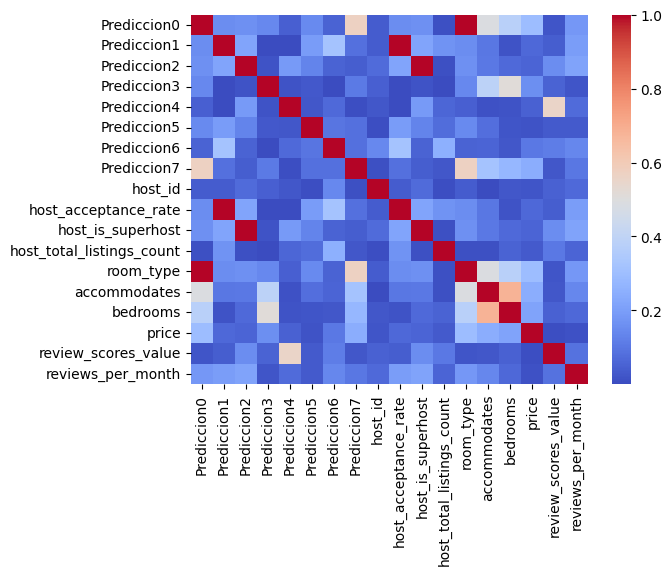

In [457]:
#Graficamos el mapa de calor de los coeficientes de correlacion
Heat_Map = sns.heatmap(Corr_Factors1, cmap='coolwarm')
Heat_Map

In [ ]:
#Ajustamos el mapa de calor de los coeficientes de correlacion
plt.figure(figsize=(12, 8))  

# Generamos el mapa de calor
Heat_Map = sns.heatmap(Corr_Factors1, cmap='Blues', annot=True, fmt=".2f")

plt.xticks(rotation=45, ha='right') 
plt.yticks(rotation=0)  
plt.tight_layout()
plt.show()